In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as skm
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import rand_score

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

In [2]:
df = pd.read_excel(r'data_lab_3.xlsx')

In [3]:
df_x = df.loc[:, ['х1', 'х2', 'х3', 'х4', 'х5', 'х6', 'x7', 'x8', 'x9']]
x_matrix = df_x.to_numpy()
print(x_matrix)

[[8.500e+00 1.630e+01 6.800e+00 5.600e+00 1.740e+01 1.630e+02 1.510e+02
  2.360e+01 2.344e+03]
 [9.300e+00 1.260e+01 7.200e+00 5.500e+00 2.530e+01 1.940e+02 2.390e+02
  9.200e+00 1.809e+03]
 [8.700e+00 4.600e+00 6.500e+00 4.200e+00 1.620e+01 1.520e+02 1.920e+02
  2.690e+01 2.406e+03]
 [8.600e+00 6.200e+00 6.100e+00 4.000e+00 1.740e+01 1.900e+02 2.050e+02
  2.010e+01 2.023e+03]
 [8.100e+00 1.140e+01 7.700e+00 6.400e+00 5.900e+00 1.830e+02 1.980e+02
  2.200e+01 1.419e+03]
 [7.000e+00 1.590e+01 8.200e+00 5.100e+00 1.380e+01 2.290e+02 1.720e+02
  2.000e+01 2.104e+03]
 [7.200e+00 1.820e+01 7.400e+00 6.100e+00 1.430e+01 1.460e+02 1.670e+02
  2.910e+01 2.489e+03]
 [7.900e+00 1.970e+01 6.400e+00 4.700e+00 1.980e+01 1.740e+02 1.440e+02
  2.280e+01 2.428e+03]
 [7.700e+00 2.080e+01 6.900e+00 5.200e+00 1.710e+01 1.280e+02 1.110e+02
  4.270e+01 2.494e+03]
 [9.200e+00 1.590e+01 7.800e+00 5.300e+00 1.670e+01 1.690e+02 1.480e+02
  2.270e+01 2.094e+03]
 [7.600e+00 1.640e+01 6.700e+00 4.700e+00 1.550e+0

In [4]:
df_y = df.loc[:, ['Ybin']]
y_matrix = df_y.to_numpy()
print(y_matrix)

[[1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_matrix, y_matrix, test_size=0.15, random_state=1)

In [6]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_n = scaler.transform(x_train)
x_test_n = scaler.transform(x_test)
x_n = scaler.transform(x_matrix)
print("Нормализованная обучающая выборка")
print(x_train_n)
print("=======================================")
print("Нормализованная тестовая выборка")
print(x_test_n)
print("=======================================")
print("Нормализованная выборка")

Нормализованная обучающая выборка
[[0.27692308 0.43636364 0.17391304 0.31111111 0.5520362  0.19724771
  0.58461538 0.3609375  0.72927536]
 [0.10769231 0.68181818 0.60869565 0.48888889 0.61085973 0.22706422
  0.35384615 0.2        0.28405797]
 [0.03846154 0.87272727 0.34782609 0.6        0.60633484 0.15825688
  0.32820513 0.303125   0.60869565]
 [0.14615385 0.61818182 0.47826087 0.66666667 0.6199095  0.38990826
  0.81538462 0.1078125  0.29217391]
 [0.4        0.27272727 0.43478261 0.46666667 0.67420814 0.03440367
  0.05641026 0.8953125  1.        ]
 [0.15384615 0.45454545 0.47826087 0.62222222 0.4841629  0.19954128
  0.41538462 0.2921875  0.53797101]
 [0.1        0.61818182 0.7826087  0.55555556 0.42986425 0.22477064
  0.28717949 0.2171875  0.13681159]
 [0.55384615 0.3        0.52173913 0.42222222 0.99547511 0.23853211
  0.24102564 0.265625   0.64753623]
 [0.32307692 0.26363636 0.60869565 0.4        0.56108597 0.16972477
  0.46153846 0.3625     0.        ]
 [0.04615385 0.68181818 0.5217

In [7]:
# Этот прекрасный кусок кода я взял на сайте sklearn
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

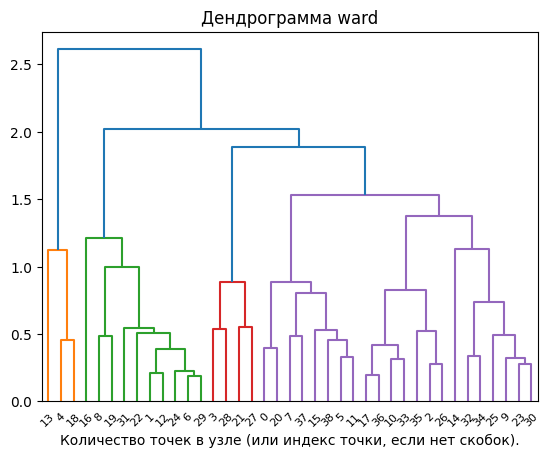

In [8]:
aggl_cluster_ward = AgglomerativeClustering(linkage='ward', compute_distances=True)
aggl_cluster_ward.fit(x_train_n)

plt.title("Дендрограмма ward")
plot_dendrogram(aggl_cluster_ward, truncate_mode="level", p=100)
plt.xlabel("Количество точек в узле (или индекс точки, если нет скобок).")
plt.show()

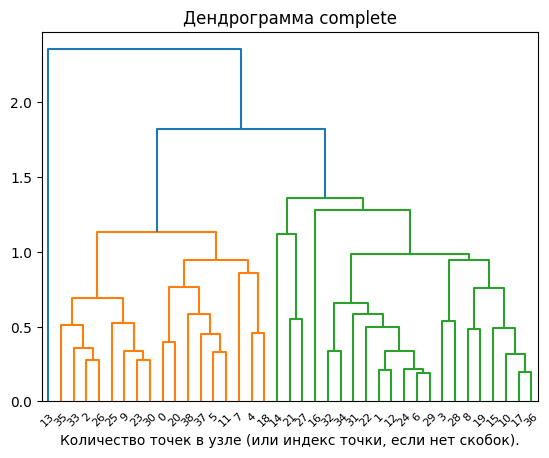

In [9]:
aggl_cluster_complete = AgglomerativeClustering(linkage='complete', compute_distances=True)
aggl_cluster_complete.fit(x_train_n)

plt.title("Дендрограмма complete")
plot_dendrogram(aggl_cluster_complete, truncate_mode="level", p=100)
plt.xlabel("Количество точек в узле (или индекс точки, если нет скобок).")
plt.show()

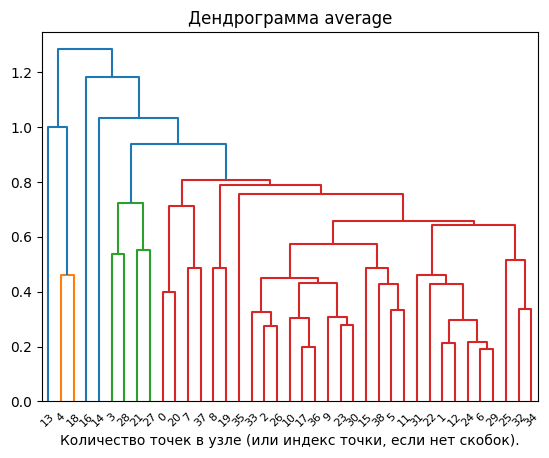

In [10]:
aggl_cluster_average = AgglomerativeClustering(linkage='average', compute_distances=True)
aggl_cluster_average.fit(x_train_n)

plt.title("Дендрограмма average")
plot_dendrogram(aggl_cluster_average, truncate_mode="level", p=100)
plt.xlabel("Количество точек в узле (или индекс точки, если нет скобок).")
plt.show()

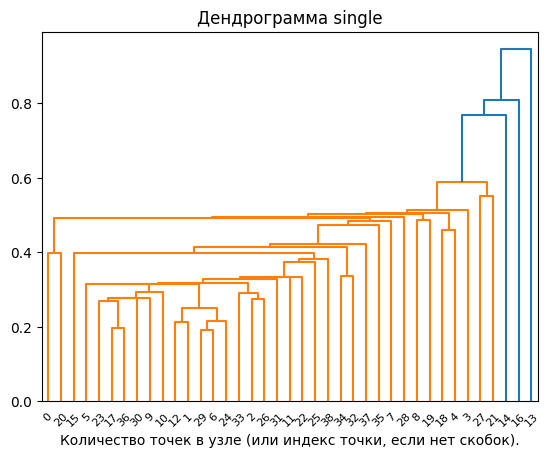

In [11]:
aggl_cluster_single = AgglomerativeClustering(linkage='single', compute_distances=True)
aggl_cluster_single.fit(x_train_n)

plt.title("Дендрограмма single")
plot_dendrogram(aggl_cluster_single, truncate_mode="level", p=100)
plt.xlabel("Количество точек в узле (или индекс точки, если нет скобок).")
plt.show()

In [12]:
best_cluster_model = AgglomerativeClustering(linkage='ward', compute_distances=True, n_clusters=5)
clusters = best_cluster_model.fit_predict(x_train_n)
for i in range(0, clusters.size):
    print("Объект", i, "Кластер", clusters[i])

Объект 0 Кластер 4
Объект 1 Кластер 2
Объект 2 Кластер 0
Объект 3 Кластер 3
Объект 4 Кластер 1
Объект 5 Кластер 4
Объект 6 Кластер 2
Объект 7 Кластер 4
Объект 8 Кластер 2
Объект 9 Кластер 0
Объект 10 Кластер 0
Объект 11 Кластер 4
Объект 12 Кластер 2
Объект 13 Кластер 1
Объект 14 Кластер 0
Объект 15 Кластер 4
Объект 16 Кластер 2
Объект 17 Кластер 0
Объект 18 Кластер 1
Объект 19 Кластер 2
Объект 20 Кластер 4
Объект 21 Кластер 3
Объект 22 Кластер 2
Объект 23 Кластер 0
Объект 24 Кластер 2
Объект 25 Кластер 0
Объект 26 Кластер 0
Объект 27 Кластер 3
Объект 28 Кластер 3
Объект 29 Кластер 2
Объект 30 Кластер 0
Объект 31 Кластер 2
Объект 32 Кластер 0
Объект 33 Кластер 0
Объект 34 Кластер 0
Объект 35 Кластер 0
Объект 36 Кластер 0
Объект 37 Кластер 4
Объект 38 Кластер 4


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
max_davies_bouldin_score = -1
best_n_clusters = 0

for n_clusters in range(2, x_train_n.shape[0]):
    k_means_model = KMeans(n_clusters)
    k_means_model.fit(x_train_n)
    davies_bouldin = davies_bouldin_score(x_train_n, k_means_model.labels_)
    print("Метрика Дэвиса-Болдина",davies_bouldin, "Число кластеров", n_clusters)
    if max_davies_bouldin_score < davies_bouldin:
        max_davies_bouldin_score = davies_bouldin
        best_n_clusters = n_clusters

Метрика Дэвиса-Болдина 1.654065941850414 Число кластеров 2
Метрика Дэвиса-Болдина 1.4784180421164603 Число кластеров 3
Метрика Дэвиса-Болдина 1.2527838494086756 Число кластеров 4
Метрика Дэвиса-Болдина 1.089029771997374 Число кластеров 5
Метрика Дэвиса-Болдина 1.0841376422801587 Число кластеров 6
Метрика Дэвиса-Болдина 0.972997731871974 Число кластеров 7
Метрика Дэвиса-Болдина 1.042005254438542 Число кластеров 8
Метрика Дэвиса-Болдина 1.0497382167054097 Число кластеров 9
Метрика Дэвиса-Болдина 0.8665338712233378 Число кластеров 10
Метрика Дэвиса-Болдина 0.9238777812471232 Число кластеров 11
Метрика Дэвиса-Болдина 0.8683105267055442 Число кластеров 12
Метрика Дэвиса-Болдина 0.8224317659890955 Число кластеров 13
Метрика Дэвиса-Болдина 0.8068359697180033 Число кластеров 14
Метрика Дэвиса-Болдина 0.7960829733876101 Число кластеров 15
Метрика Дэвиса-Болдина 0.7947988991858346 Число кластеров 16
Метрика Дэвиса-Болдина 0.7423175084596362 Число кластеров 17
Метрика Дэвиса-Болдина 0.67234940786

In [15]:
rand_ind = rand_score(best_cluster_model.labels_, KMeans(38).fit_predict(x_train_n))
print("Индекс Рэнда:", rand_ind)

Индекс Рэнда: 0.7678812415654521


In [22]:
labels = best_cluster_model.labels_
x_with_labels = pd.DataFrame(x_train_n, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'])
x_with_labels["Cluster"] = labels

means_by_clusters = x_with_labels.groupby("Cluster").mean()
print(means_by_clusters)

               x1        x2        x3        x4        x5        x6        x7  \
Cluster                                                                         
0        0.062637  0.666883  0.478261  0.720635  0.463154  0.195773  0.270696   
1        0.587179  0.254545  0.231884  0.274074  0.698341  0.040520  0.111111   
2        0.120000  0.600000  0.734783  0.562222  0.528507  0.278440  0.361538   
3        0.203846  0.313636  0.619565  0.738889  0.705882  0.371560  0.876923   
4        0.240385  0.386364  0.391304  0.480556  0.619344  0.187213  0.373718   

               x8        x9  
Cluster                      
0        0.270647  0.573458  
1        0.871354  0.946860  
2        0.260937  0.173565  
3        0.124609  0.584203  
4        0.311328  0.705580  
